In [1]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_json('../Dataset_Clean.json')

In [3]:
stop_words = set(stopwords.words('english'))
def preprocess_for_lda(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return [word for word in text.split() if word not in stop_words and len(word) > 2]

In [4]:
processed_docs = df['text'].apply(preprocess_for_lda)
dictionary = corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filter out rare/common tokens
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [5]:
NUM_TOPICS = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=NUM_TOPICS, random_state=100, chunksize=100, passes=10)

In [6]:
def plot_topic_dashboard(lda_model, num_topics):
    """Creates a beautiful dashboard-style plot for LDA topics."""
    words_per_topic = 8
    topics = lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=words_per_topic)

    # Define an aesthetic color palette
    colors = plt.cm.magma(np.linspace(0, 0.8, num_topics))

    # Create subplots
    fig, axes = plt.subplots(num_topics, 1, figsize=(10, 3 * num_topics), sharex=True)
    axes = axes.flatten()

    for i, (topic_num, topic_words) in enumerate(topics):
        topic_words_df = pd.DataFrame(topic_words, columns=['word', 'weight'])
        ax = axes[i]

        # Plot bars
        ax.barh(topic_words_df['word'], topic_words_df['weight'], color=colors[i])
        ax.invert_yaxis() # Words are easier to read top-to-bottom

        # Set title and styling
        ax.set_title(f'Topic {i+1}: The "{topic_words_df["word"].iloc[0].capitalize()}" Theme', fontsize=14, loc='left', pad=10)
        ax.set_xlabel('Word Importance (Weight)', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_alpha(0.3)
        ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

    fig.suptitle('Customer Request Topic Profile Dashboard', fontsize=20, y=1.02)
    plt.tight_layout(pad=3.0)
    plt.show()

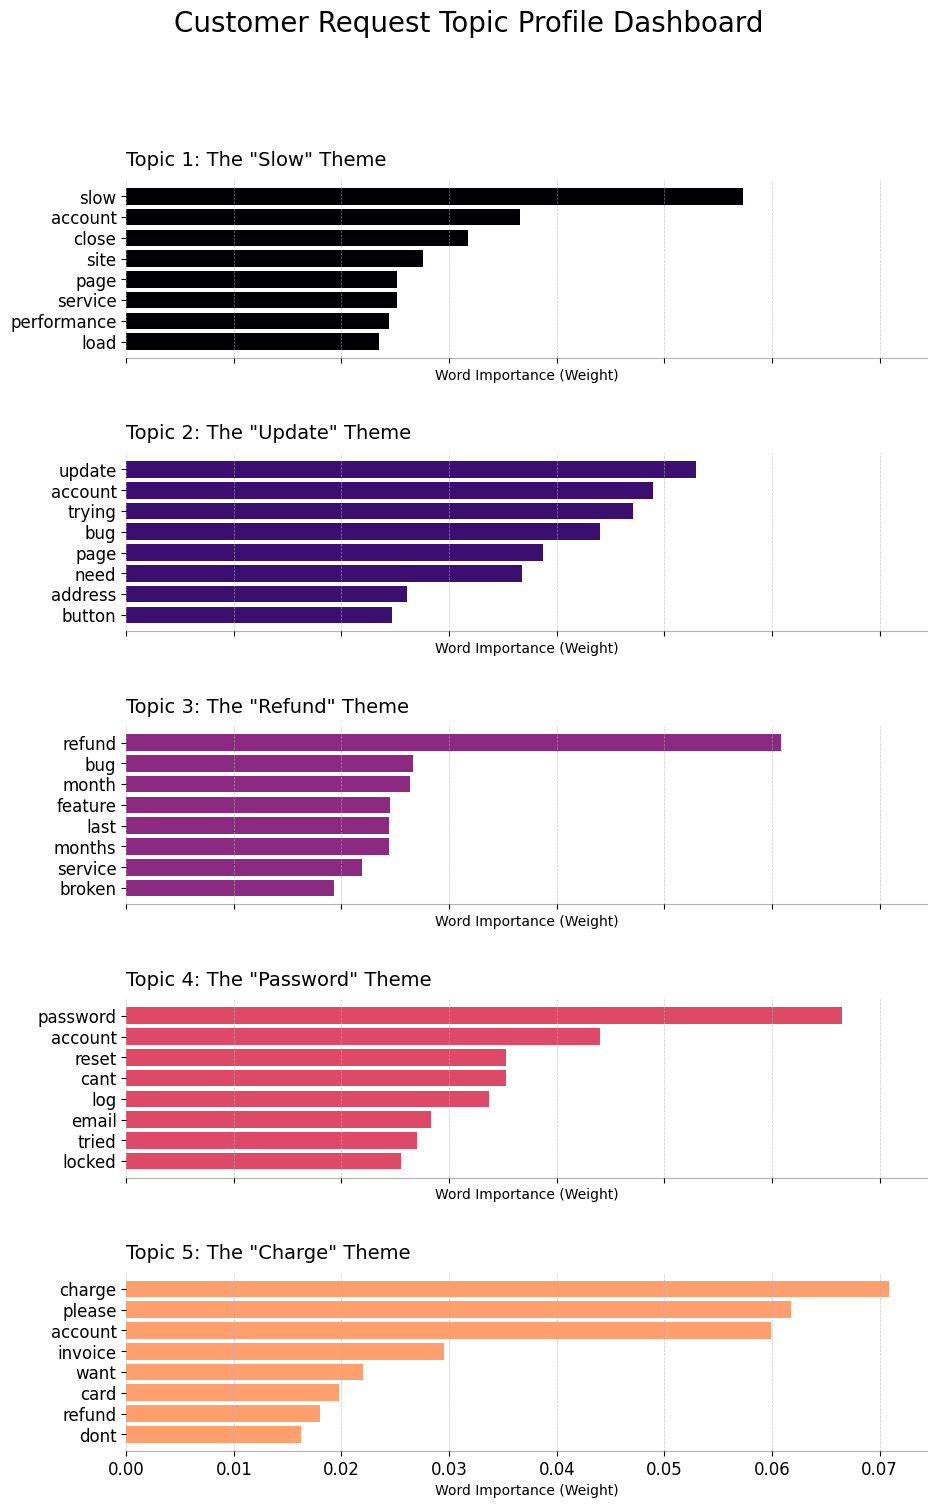

In [7]:
plot_topic_dashboard(lda_model, num_topics=NUM_TOPICS)